# Classification Of Coins using Custom CNN Model

In [65]:
#Data Analysis Phase
#Main Aim is to understnad more about the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")
##Display all the columns in Data Frame

pd.pandas.set_option('display.max_columns',None)
from glob import glob
# For prepocessing
from sklearn import preprocessing
# For Train Test Split
from sklearn.model_selection import train_test_split

# Importing Deep Learning Keras library
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras import optimizers
from keras.utils import to_categorical

#For CNN
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten,Activation


In [2]:
train_path = r'C:\Users\Mizgaan\Downloads\classification_dataset\Train'
valid_path = r'C:\Users\Mizgaan\Downloads\classification_dataset\Test'


In [71]:
folders = glob(r'C:\Users\Mizgaan\Downloads\classification_dataset\Train\*')
(folders)

['C:\\Users\\Mizgaan\\Downloads\\classification_dataset\\Train\\100_Coin',
 'C:\\Users\\Mizgaan\\Downloads\\classification_dataset\\Train\\10_Coin',
 'C:\\Users\\Mizgaan\\Downloads\\classification_dataset\\Train\\25_Coin',
 'C:\\Users\\Mizgaan\\Downloads\\classification_dataset\\Train\\50_Coin',
 'C:\\Users\\Mizgaan\\Downloads\\classification_dataset\\Train\\5_Coin']

In [3]:
# Preprocessing training Set
from keras.preprocessing.image import ImageDataGenerator
train_data_gen=ImageDataGenerator(rescale=1/255, shear_range=0.2,
                   zoom_range=0.2,horizontal_flip=True)

train_set=train_data_gen.flow_from_directory(train_path,
                                   target_size=(64,64),batch_size=32,class_mode='categorical')


Found 2789 images belonging to 5 classes.


In [4]:
test_gen=ImageDataGenerator(rescale=1/255)

test_set=test_gen.flow_from_directory(valid_path,
                             target_size=(64,64),batch_size=32,class_mode='categorical')

Found 1095 images belonging to 5 classes.


## ## Making CNN Model

In [5]:
classifier =Sequential()


In [6]:
#Adding 1st Convolutional Layer
classifier.add(Conv2D(filters =32,kernel_size=(3,3),padding = 'Same',activation='relu',kernel_initializer = 'he_uniform',
                                                input_shape=[64,64,3]))          
# classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


# Adding 2nd Convolutional Layer
classifier.add(Conv2D(filters =28,kernel_size=(3,3),padding = 'Same',activation='relu',kernel_initializer = 'he_uniform'))   

classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# classifier.add(Dropout(0.3)) # To avoid Overfitting we use Drop Out Layer
 
    
# Adding 3rd Convolutional Layer
classifier.add(Conv2D(filters =30,kernel_size=(3,3),activation='relu',kernel_initializer = 'he_uniform'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
classifier.add(Dropout(0.6))

# # Adding 4th Convolutional Layer
# classifier.add(Conv2D(filters =30,kernel_size=(3,3),activation='relu',kernel_initializer = 'he_uniform'))

# # Adding 5th Convolutional Layer
# classifier.add(Conv2D(filters =28,kernel_size=(3,3),padding = 'Same',activation='relu',kernel_initializer = 'he_uniform'))   

# classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


#         kernel_size=hp.Choice('conv_3_filter', values = [3,5]),padding = 'Same',   
   
classifier.add(Flatten())
# classifier.add(Dense(512))
    # Adding the output layer
#     classifier.add(Dense(units=('dense_1_units', min_value=32, max_value=128, step=16),
#         activation='relu'))
   

classifier.add(Dense(20,activation='relu'))
classifier.add(Dense(15,activation='relu'))


classifier.add(Dense(units=5, activation='softmax',kernel_initializer = 'glorot_uniform'))
    

In [7]:
# Compiling
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
   

In [8]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 28)        8092      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 28)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 30)        7590      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 30)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 30)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6750)             

In [9]:
model_history=classifier.fit(x=train_set, validation_data=test_set,epochs = 100)


Epoch 1/100
88/88 [==============================] - 92s 1s/step - loss: 1.5970 - accuracy: 0.2166 - val_loss: 1.6706 - val_accuracy: 0.1708
Epoch 2/100
88/88 [==============================] - 85s 968ms/step - loss: 1.5908 - accuracy: 0.2180 - val_loss: 1.5414 - val_accuracy: 0.2174
Epoch 3/100
88/88 [==============================] - 89s 1s/step - loss: 1.5894 - accuracy: 0.2327 - val_loss: 1.5564 - val_accuracy: 0.1680
Epoch 4/100
88/88 [==============================] - 56s 638ms/step - loss: 1.5838 - accuracy: 0.2492 - val_loss: 1.4653 - val_accuracy: 0.3096
Epoch 5/100
88/88 [==============================] - 34s 391ms/step - loss: 1.4377 - accuracy: 0.3862 - val_loss: 1.7629 - val_accuracy: 0.3863
Epoch 6/100
88/88 [==============================] - 35s 395ms/step - loss: 1.2813 - accuracy: 0.4529 - val_loss: 0.9518 - val_accuracy: 0.4384
Epoch 7/100
88/88 [==============================] - 36s 408ms/step - loss: 1.1771 - accuracy: 0.5192 - val_loss: 1.1778 - val_accuracy: 0.548

## ## Model Accuracy for Test Data

In [13]:
test_loss,test_acc=classifier.evaluate(test_set)

print('{:#.3g}'.format(test_acc),' : Is the accuracy \n')
print(np.round(test_loss,2),':  Is the Loss')

35/35 [==============================] - 4s 115ms/step
0.889  : Is the accuracy 

0.12 :  Is the Loss


## Model Performance

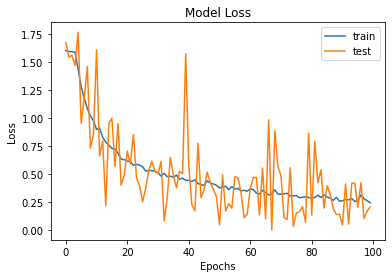

In [14]:
#plot the Loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

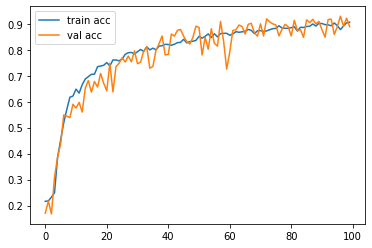

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the accuracy
plt.plot(model_history.history['accuracy'], label='train acc')
plt.plot(model_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [44]:
# Saving the model for predection
classifier.save('Coins_Classification.h5')

In [45]:
# Loading the Saved Images

from tensorflow.keras.models import load_model
model=load_model('Coins_Classification.h5')

### Making Single Prediciton

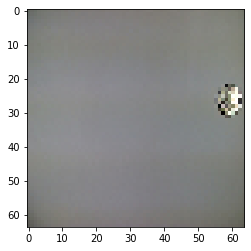

In [119]:
from tensorflow.keras.preprocessing import image
#C:\Users\Mizgaan\Downloads\classification_dataset\Test\50_Coin\50_1477282290.jpg
test_img=image.load_img(r'C:\Users\Mizgaan\Downloads\classification_dataset\Test\50_Coin\50_1477282290.jpg',target_size=(64,64))
test_img=image.img_to_array(test_img)
test_img=test_img/255

plt.imshow(test_img)

test_img=np.expand_dims(test_img,axis=0)

In [120]:
reslt=classifier.predict(test_img)

In [121]:
reslt

array([[0.01022988, 0.24734676, 0.07601741, 0.63707566, 0.02933032]],
      dtype=float32)

In [122]:
a=np.argmax(classifier.predict(test_img))
a

3

In [116]:
import re 
if a ==0:
    print('The Coin Is: {}'.format( ''.join(re.findall(r'\d+', folders[0]))))
elif a==1:
    print('The Coin Is: {}'.format( ''.join(re.findall(r'\d+', folders[1]))))
elif a==2:
    print('The Coin Is: {}'.format( ''.join(re.findall(r'\d+', folders[2]))))
elif a==3:
    print('The Coin Is: {}'.format( ''.join(re.findall(r'\d+', folders[3]))))
elif a==4 :
    print('The Coin Is: {}'.format( ''.join(re.findall(r'\d+', folders[4]))))

the Coin Is: 50
